In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as db
import warnings

warnings.filterwarnings('ignore')
sns.set_style('white')
plt.style.use('seaborn-v0_8-deep')
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
DATABASE_URL = "sqlite:///../db/database.db"
engine = db.create_engine(DATABASE_URL)

In [3]:
query = "SELECT * FROM houses"

df = pd.read_sql(query, con=engine)
df.head()

,id,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance
0,1,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42
1,2,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63
2,3,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41
3,4,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17
4,5,São Paulo,25,1,1,0,1,0,0,0,800,25,11


In [4]:
colunas_dict = {
    "id": "identificador unico",
    "city": "Cidade onde o imóvel está localizado",
    "area": "Área útil do imóvel em m²",
    "rooms": "Quantidade de quartos",
    "bathroom": "Quantidade de banheiros",
    "parking_spaces": "Número de vagas de estacionamento",
    "floor": "Andar em que o imóvel está localizado (se aplicável)",
    "animal": "Se animais são permitidos (1/0)",
    "furniture": "Se o imóvel é mobiliado (1/0)",
    "hoa": "Valor do condomínio (Homeowners Association)",
    "rent_amount": "Valor do aluguel mensal",
    "property_tax": "Valor do imposto sobre a propriedade",
    "fire_insurance": "Valor do seguro contra incêndio",
}

target = "rent_amount"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10692 non-null  int64 
 1   city            10692 non-null  object
 2   area            10692 non-null  int64 
 3   rooms           10692 non-null  int64 
 4   bathroom        10692 non-null  int64 
 5   parking_spaces  10692 non-null  int64 
 6   floor           10692 non-null  int64 
 7   animal          10692 non-null  int64 
 8   furniture       10692 non-null  int64 
 9   hoa             10692 non-null  int64 
 10  rent_amount     10692 non-null  int64 
 11  property_tax    10692 non-null  int64 
 12  fire_insurance  10692 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


In [6]:
df.describe()

,id,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,5346.50,149.22,2.51,2.24,1.61,5.07,0.78,0.24,1174.02,3896.25,366.70,53.30
std,3086.66,537.02,1.17,1.41,1.59,6.07,0.42,0.43,15592.31,3408.55,3107.83,47.77
min,1.00,11.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,450.00,0.00,3.00
25%,2673.75,56.00,2.00,1.00,0.00,1.00,1.00,0.00,170.00,1530.00,38.00,21.00
50%,5346.50,90.00,2.00,2.00,1.00,3.00,1.00,0.00,560.00,2661.00,125.00,36.00
75%,8019.25,182.00,3.00,3.00,2.00,8.00,1.00,0.00,1237.50,5000.00,375.00,68.00
max,10692.00,46335.00,13.00,10.00,12.00,301.00,1.00,1.00,1117000.00,45000.00,313700.00,677.00


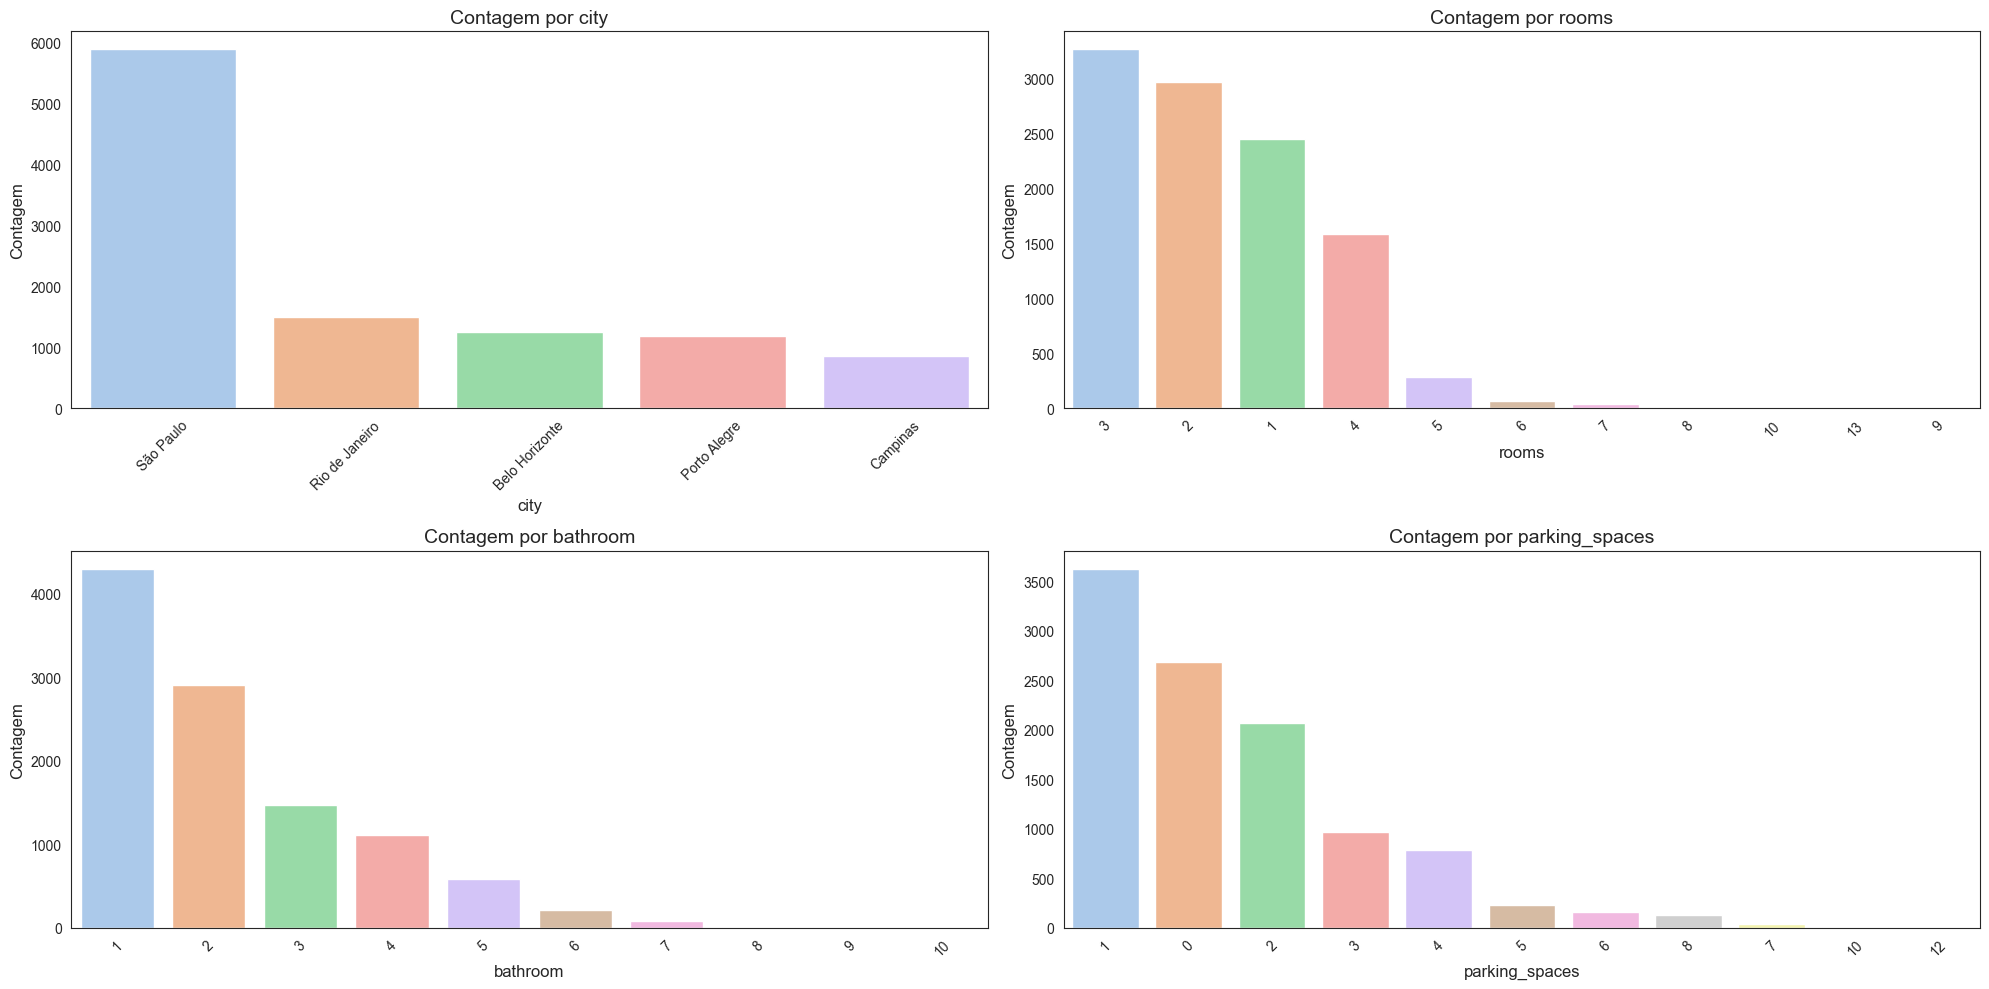

In [7]:
catc = ['city', 'rooms', 'bathroom', 'parking_spaces']

plt.figure(figsize=(20, 10))

# Loop para criar 4 gráficos de barras
for i, col in enumerate(catc, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)
    plt.title(f'Contagem por {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

São Paulo = MAD : 2804.43, STD : 3634.61
Porto Alegre = MAD : 1361.50, STD : 2199.70
Rio de Janeiro = MAD : 1952.43, STD : 2804.27
Campinas = MAD : 1569.38, STD : 2310.90
Belo Horizonte = MAD : 2611.43, STD : 3493.66


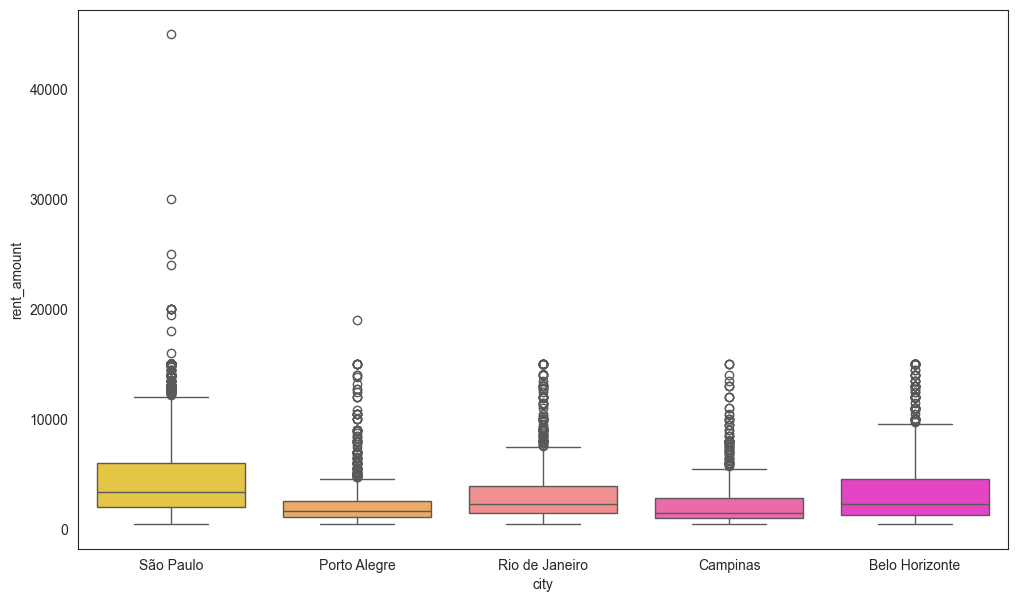

In [8]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=df, x='city', y='rent_amount', palette='spring_r')

for city in df['city'].unique():
    city_data = df[df['city'] == city]['rent_amount']
    mad = (city_data - city_data.mean()).abs().mean()  # MAD manual
    std = city_data.std()
    print(f"{city} = MAD : {mad:.2f}, STD : {std:.2f}")

in city São Paulo 0.76% of houses allow pets
in city Porto Alegre 0.84% of houses allow pets
in city Rio de Janeiro 0.80% of houses allow pets
in city Campinas 0.81% of houses allow pets
in city Belo Horizonte 0.74% of houses allow pets


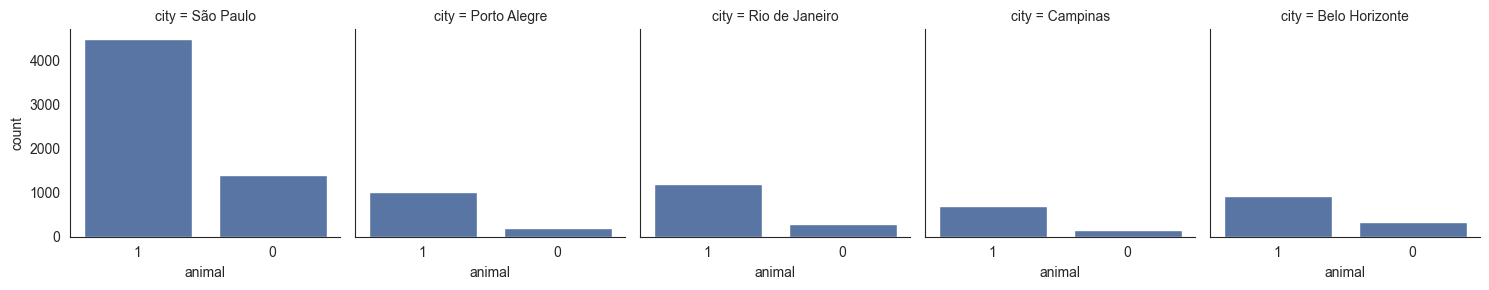

In [9]:
g = sns.FacetGrid(df, col="city")
g.map(sns.countplot, 'animal', order=[1, 0])
#lets see the percentage of houses that allow pets in each city
for city in df.city.unique():
    city_data = df[df.city == city]
    print('in city {} {}% of houses allow pets'.format(city, str(city_data.animal.value_counts()[1]/city_data.shape[0])[:4]))

in city São Paulo 0.27% of houses allow furniture
in city Porto Alegre 0.26% of houses allow furniture
in city Rio de Janeiro 0.27% of houses allow furniture
in city Campinas 0.13% of houses allow furniture
in city Belo Horizonte 0.14% of houses allow furniture


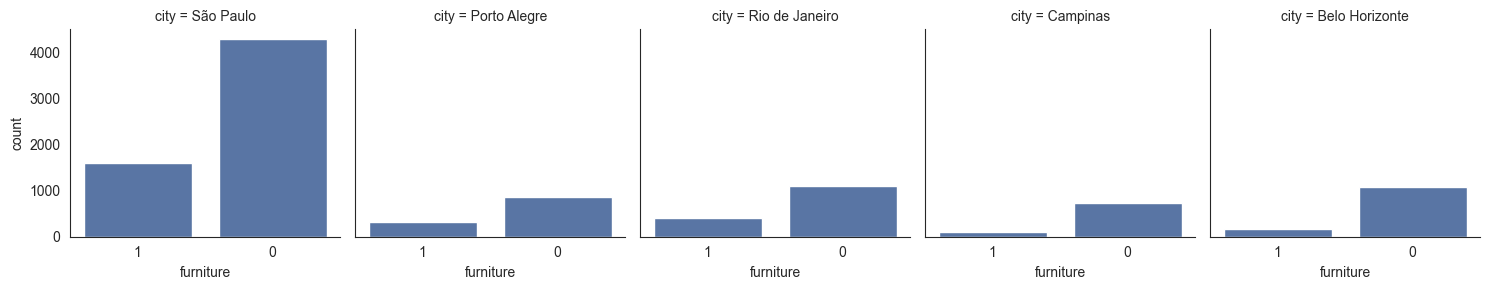

In [10]:
g = sns.FacetGrid(df, col="city")
g.map(sns.countplot, 'furniture', order=[1, 0])

for city in df.city.unique():
    city_data = df[df.city == city]
    print('in city {} {}% of houses allow furniture'.format(city, str(city_data.furniture.value_counts()[1]/city_data.shape[0])[:4]))